# Breast Tumor Data Exploration
  
  

Breast cancer is the most common malignancy among women, accounting for nearly 1 in 3 cancers diagnosed among women in the United States, and it is the second leading cause of cancer death among women. Breast Cancer occurs as a results of abnormal growth of cells in the breast tissue, commonly referred to as a Tumor. A tumor does not mean cancer - tumors can be benign (not cancerous), pre-malignant (pre-cancerous), or malignant (cancerous). Tests such as MRI, mammogram, ultrasound and biopsy are commonly used to diagnose breast cancer performed.

The [Breast Cancer](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29) datasets is available machine learning repository maintained by the University of California, Irvine. The dataset contains **569 samples of malignant and benign tumor cells**.
* The first two columns in the dataset store the unique ID numbers of the samples and the corresponding diagnosis (M=malignant, B=benign), respectively.
* The columns 3-32 contain 30 real-value features that have been computed from digitized images of the cell nuclei, which can be used to build a model to predict whether a tumor is benign or malignant.

#### Getting Started: Load libraries and set options

In [1]:
#load libraries
import numpy as np         # linear algebra
import pandas as pd        # data processing, CSV file I/O (e.g. pd.read_csv)

#### Load Dataset

First, load the supplied CSV file using additional options in the Pandas read_csv function.

In [2]:
# For Google colab users
url = 'https://raw.githubusercontent.com/acolajanni/Python_DoubleCursus/main/data/Breast_cancer.csv'

data = pd.read_csv(url)
data

,id,diagnosis,fractal_dimension_mean,symmetry_mean,concave points_mean,concavity_mean,compactness_mean,smoothness_mean,area_mean,perimeter_mean,texture_mean,radius_mean
0,842302,M,0.07871,0.2419,0.14710,0.30010,0.27760,0.11840,1001.0,122.80,10.38,17.99
1,842517,M,0.05667,0.1812,0.07017,0.08690,0.07864,0.08474,1326.0,132.90,17.77,20.57
2,84300903,M,0.05999,0.2069,0.12790,0.19740,0.15990,0.10960,1203.0,130.00,21.25,19.69
3,84348301,M,0.09744,0.2597,0.10520,0.24140,0.28390,0.14250,386.1,77.58,20.38,11.42
4,84358402,M,0.05883,0.1809,0.10430,0.19800,0.13280,0.10030,1297.0,135.10,14.34,20.29
...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,0.05623,0.1726,0.13890,0.24390,0.11590,0.11100,1479.0,142.00,22.39,21.56
565,926682,M,0.05533,0.1752,0.09791,0.14400,0.10340,0.09780,1261.0,131.20,28.25,20.13
566,926954,M,0.05648,0.1590,0.05302,0.09251,0.10230,0.08455,858.1,108.30,28.08,16.60
567,927241,M,0.07016,0.2397,0.15200,0.35140,0.27700,0.11780,1265.0,140.10,29.33,20.60


In [3]:
data.columns

Index(['id', 'diagnosis', 'fractal_dimension_mean', 'symmetry_mean',
       'concave points_mean', 'concavity_mean', 'compactness_mean',
       'smoothness_mean', 'area_mean', 'perimeter_mean', 'texture_mean',
       'radius_mean'],
      dtype='object')

#### Inspecting the data
The first step is to visually inspect the new data set. There are multiple ways to achieve this:
* The easiest being to request the first few records using the DataFrame data.head()* method. By default, “data.head()” returns the first 5 rows from the DataFrame object df (excluding the header row).
* Alternatively, one can also use “df.tail()” to return the five rows of the data frame.
* For both head and  tail methods, there is an option to specify the number of records by including the required number in between the parentheses when calling either method.Inspecting the data

In [4]:
data.head(5)

,id,diagnosis,fractal_dimension_mean,symmetry_mean,concave points_mean,concavity_mean,compactness_mean,smoothness_mean,area_mean,perimeter_mean,texture_mean,radius_mean
0,842302,M,0.07871,0.2419,0.14710,0.3001,0.27760,0.11840,1001.0,122.80,10.38,17.99
1,842517,M,0.05667,0.1812,0.07017,0.0869,0.07864,0.08474,1326.0,132.90,17.77,20.57
2,84300903,M,0.05999,0.2069,0.12790,0.1974,0.15990,0.10960,1203.0,130.00,21.25,19.69
3,84348301,M,0.09744,0.2597,0.10520,0.2414,0.28390,0.14250,386.1,77.58,20.38,11.42
4,84358402,M,0.05883,0.1809,0.10430,0.1980,0.13280,0.10030,1297.0,135.10,14.34,20.29


In [5]:
data.tail(5)

,id,diagnosis,fractal_dimension_mean,symmetry_mean,concave points_mean,concavity_mean,compactness_mean,smoothness_mean,area_mean,perimeter_mean,texture_mean,radius_mean
564,926424,M,0.05623,0.1726,0.13890,0.24390,0.11590,0.11100,1479.0,142.00,22.39,21.56
565,926682,M,0.05533,0.1752,0.09791,0.14400,0.10340,0.09780,1261.0,131.20,28.25,20.13
566,926954,M,0.05648,0.1590,0.05302,0.09251,0.10230,0.08455,858.1,108.30,28.08,16.60
567,927241,M,0.07016,0.2397,0.15200,0.35140,0.27700,0.11780,1265.0,140.10,29.33,20.60
568,92751,B,0.05884,0.1587,0.00000,0.00000,0.04362,0.05263,181.0,47.92,24.54,7.76


In [6]:
# Id column is redundant and not useful, we want to drop it
data.drop('id', axis = 1, inplace=True)
#data.drop('Unnamed: 0', axis=1, inplace=True)
data.head(5)

,diagnosis,fractal_dimension_mean,symmetry_mean,concave points_mean,concavity_mean,compactness_mean,smoothness_mean,area_mean,perimeter_mean,texture_mean,radius_mean
0,M,0.07871,0.2419,0.14710,0.3001,0.27760,0.11840,1001.0,122.80,10.38,17.99
1,M,0.05667,0.1812,0.07017,0.0869,0.07864,0.08474,1326.0,132.90,17.77,20.57
2,M,0.05999,0.2069,0.12790,0.1974,0.15990,0.10960,1203.0,130.00,21.25,19.69
3,M,0.09744,0.2597,0.10520,0.2414,0.28390,0.14250,386.1,77.58,20.38,11.42
4,M,0.05883,0.1809,0.10430,0.1980,0.13280,0.10030,1297.0,135.10,14.34,20.29


You can check the number of cases, as well as the number of fields, using the shape method, as shown below.

In [7]:
data.shape

(569, 11)

In the result displayed, you can see the data has 569 records, each with 32 columns.

The **“info()”** method provides a concise summary of the data; from the output, it provides the type of data in each column, the number of non-null values in each column, and how much memory the data frame is using.

The method **dtypes.value_counts()** will return the number of columns of each type in a DataFrame:

In [8]:
# Review data types with "info()".
data.info()
data.dtypes.value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   diagnosis               569 non-null    object 
 1   fractal_dimension_mean  569 non-null    float64
 2   symmetry_mean           569 non-null    float64
 3   concave points_mean     569 non-null    float64
 4   concavity_mean          569 non-null    float64
 5   compactness_mean        569 non-null    float64
 6   smoothness_mean         569 non-null    float64
 7   area_mean               569 non-null    float64
 8   perimeter_mean          569 non-null    float64
 9   texture_mean            569 non-null    float64
 10  radius_mean             569 non-null    float64
dtypes: float64(10), object(1)
memory usage: 49.0+ KB


float64    10
object      1
dtype: int64

From the above results, from the 31 variables column id number 1: "diagnosis" with 569 non-null object, the rest are float. More on [python variables](https://www.tutorialspoint.com/python/python_variable_types.htm)

In [9]:
#check for missing variables
data.isnull().any()

diagnosis                 False
fractal_dimension_mean    False
symmetry_mean             False
concave points_mean       False
concavity_mean            False
compactness_mean          False
smoothness_mean           False
area_mean                 False
perimeter_mean            False
texture_mean              False
radius_mean               False
dtype: bool

In [10]:
data.diagnosis.unique()

array(['M', 'B'], dtype=object)

In [11]:
data.describe()

,fractal_dimension_mean,symmetry_mean,concave points_mean,concavity_mean,compactness_mean,smoothness_mean,area_mean,perimeter_mean,texture_mean,radius_mean
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.062798,0.181162,0.048919,0.088799,0.104341,0.096360,654.889104,91.969033,19.289649,14.127292
std,0.007060,0.027414,0.038803,0.079720,0.052813,0.014064,351.914129,24.298981,4.301036,3.524049
min,0.049960,0.106000,0.000000,0.000000,0.019380,0.052630,143.500000,43.790000,9.710000,6.981000
25%,0.057700,0.161900,0.020310,0.029560,0.064920,0.086370,420.300000,75.170000,16.170000,11.700000
50%,0.061540,0.179200,0.033500,0.061540,0.092630,0.095870,551.100000,86.240000,18.840000,13.370000
75%,0.066120,0.195700,0.074000,0.130700,0.130400,0.105300,782.700000,104.100000,21.800000,15.780000
max,0.097440,0.304000,0.201200,0.426800,0.345400,0.163400,2501.000000,188.500000,39.280000,28.110000


#### Counting the different values of diagnosis:

1. Using df.groupby()

In [12]:
# Group by diagnosis and review the output.
diag_gr = data.groupby('diagnosis', axis=0)
pd.DataFrame(diag_gr.size(), columns=['# of observations'])

,# of observations
diagnosis,
B,357
M,212


2. Using Counter() for the collections library

In [13]:
from collections import Counter

diag_gr = Counter(data.diagnosis)
diag_gr = pd.DataFrame.from_dict(diag_gr, orient='index',  columns=['# of observations'])
diag_gr

,# of observations
M,212
B,357


From the results above, diagnosis is a categorical variable, because it represents a fix number of possible values (i.e, Malignant, of Benign. The machine learning algorithms wants numbers, and not strings, as their inputs so we need some method of coding to convert them.



Text(0.5, 1.0, 'Barplot showing the number of benign and malignant tumor')

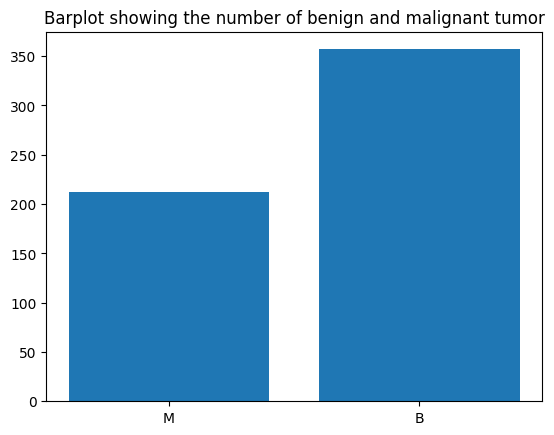

In [14]:
import matplotlib.pyplot as plt

plt.bar(height=diag_gr['# of observations'], x=diag_gr.index)
plt.title("Barplot showing the number of benign and malignant tumor")

##  Visualise distribution of data via scatterplots

Scatterplot are commonly used to visualize two numerical variables.

Using scatterplots is a good way to visualy verify if it exist a link between two variables.


Text(0, 0.5, 'texture_mean')

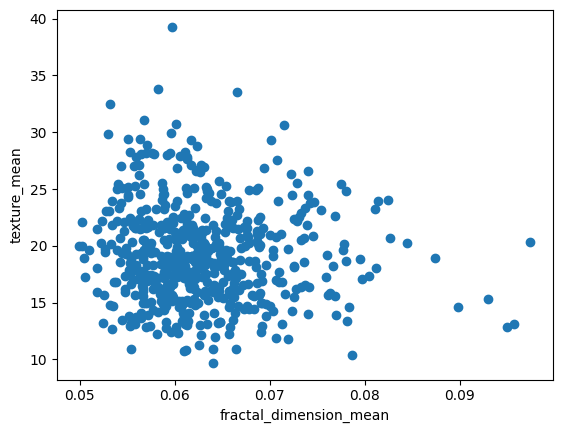

In [15]:
plt.scatter(data.values[:,1],data.values[:,9])
plt.xlabel(data.columns[1])
plt.ylabel(data.columns[9])

**Using scatterplots, it is possible to outline thee different groups**

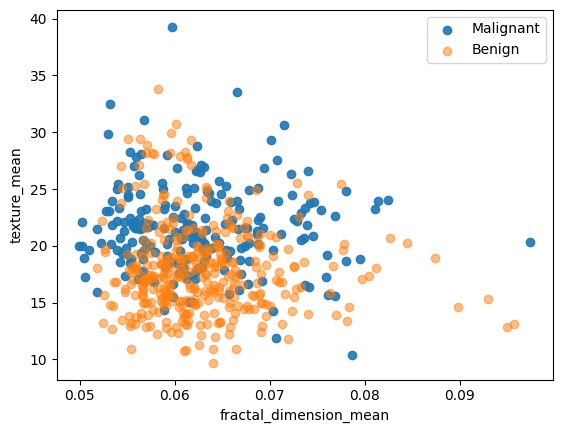

In [16]:
M = data[data.diagnosis=="M"]
B = data[data.diagnosis=="B"]

plt.scatter(M.values[:,1],M.values[:,9],  label='Malignant', alpha=0.9)
plt.scatter(B.values[:,1],B.values[:,9],  label='Benign',  alpha=0.5)

plt.xlabel(M.columns[1])
plt.ylabel(M.columns[9])

plt.legend()

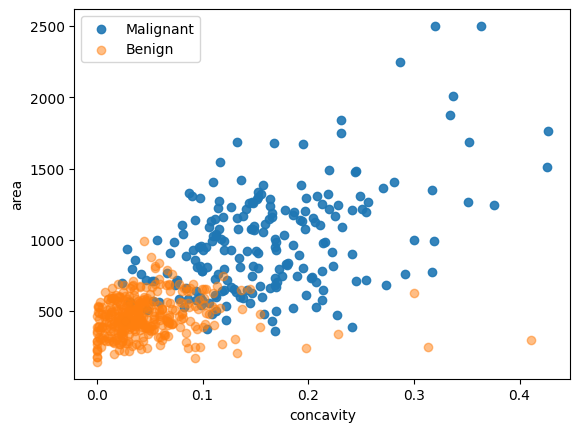

In [17]:
plt.scatter(M.concavity_mean.values ,M.area_mean.values,  label='Malignant',  alpha=0.9)
plt.scatter(B.concavity_mean.values ,B.area_mean.values,  label='Benign' ,  alpha=0.5)

plt.xlabel("concavity")
plt.ylabel("area")

plt.legend()

##  Visualise distribution of data via histograms
Histograms are commonly used to visualize numerical variables. A histogram is similar to a bar graph after the values of the variable are grouped (binned) into a finite number of intervals (bins).

Histograms group data into bins and provide you a count of the number of observations in each bin. From the shape of the bins you can quickly get a feeling for whether an attribute is Gaussian, skewed or even has an exponential distribution. It can also help you see possible outliers.

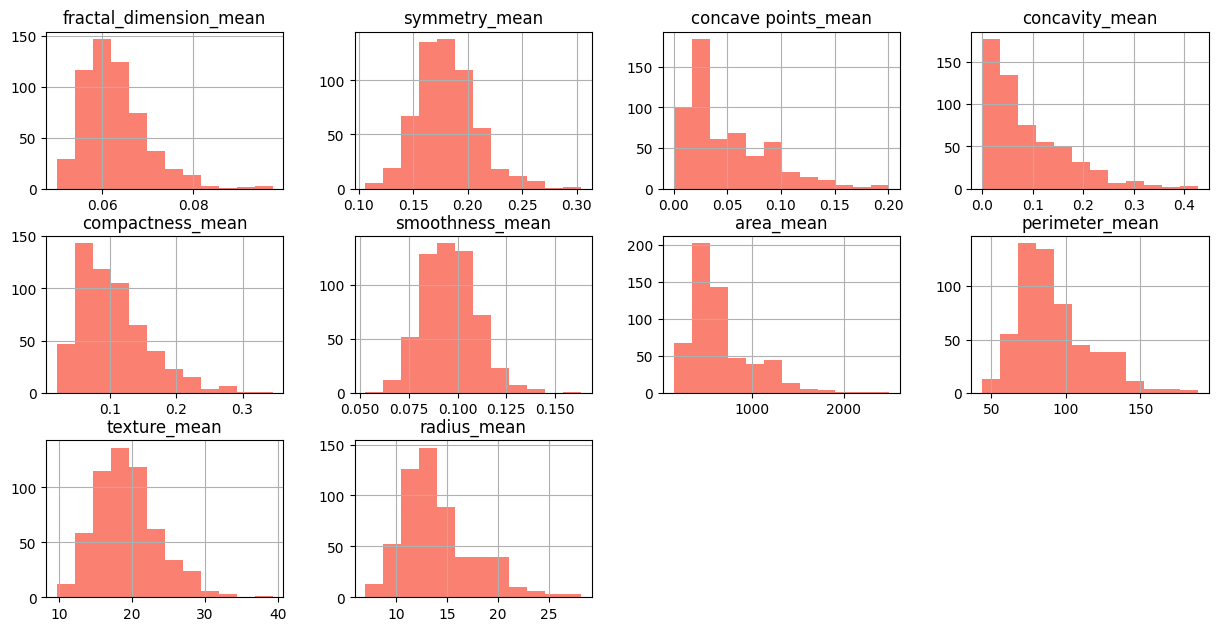

In [18]:
data_mean=data.iloc[:,1:]
hist_mean=data_mean.hist( bins=12, figsize=(15, 10),grid=True, color = 'salmon', layout=(4,4) )

In [19]:
data.columns

Index(['diagnosis', 'fractal_dimension_mean', 'symmetry_mean',
       'concave points_mean', 'concavity_mean', 'compactness_mean',
       'smoothness_mean', 'area_mean', 'perimeter_mean', 'texture_mean',
       'radius_mean'],
      dtype='object')

### __Observation__

>We can see that perhaps the variable  **concavity_mean**, may have an exponential distribution ( ). We can also see that perhaps the **symmetry_mean** and **fractal_dimension**_mean attributes may have a Gaussian or nearly Gaussian distribution. This is interesting because many machine learning techniques assume a Gaussian univariate distribution on the input variables.


### Do the same for the other variables:

In [20]:
# For data.iloc[:,5:9]

In [21]:
# For data.iloc[:,9:]

**An alternative for the histogram, is the density plot** :

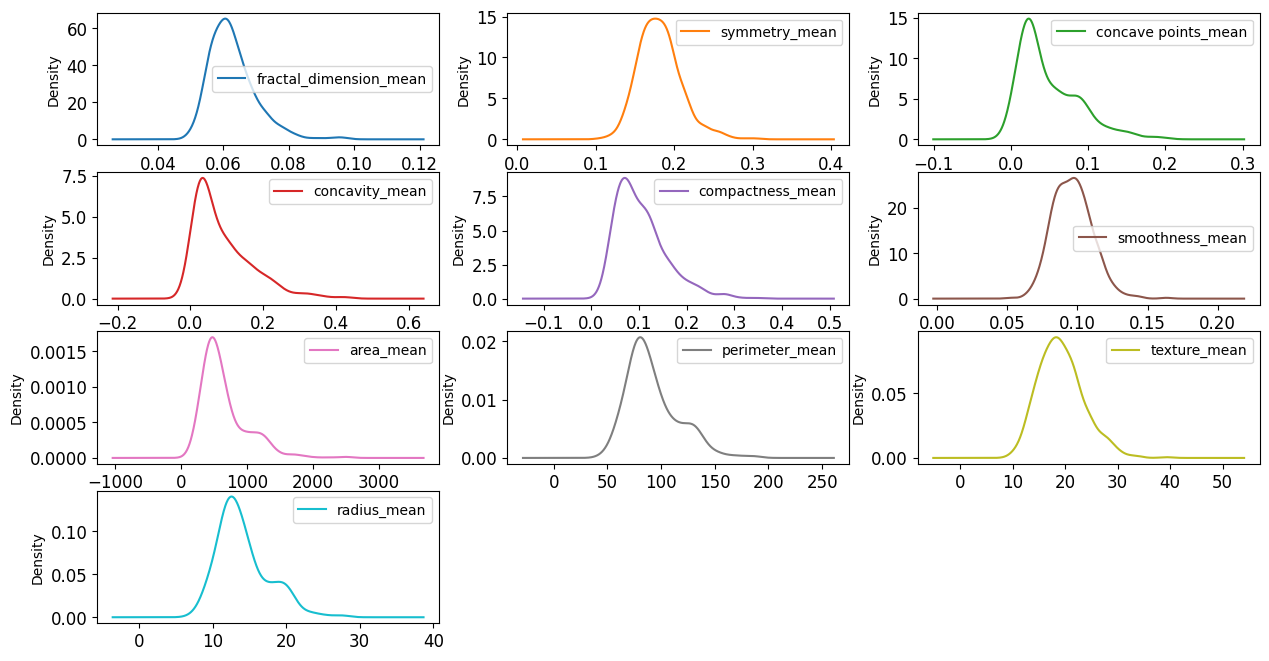

In [22]:
plt = data.iloc[:,1:].plot(kind= 'density', subplots=True, layout=(5,3), sharex=False,
                     sharey=False,fontsize=12, figsize=(15,10))


## Comparison between groups:
Is the mean symmetry across multiple measures significantly different between malignant and benign tumors?

#### H0: There is no significative differences of symmetry_mean between the two types of tumors with an error risk of $\alpha$ = 0.05
> $\mu_B = \mu_M $

#### H1: There is a significative differences of symmetry_mean between the two types of tumors with an error risk of $\alpha$ = 0.05
> $\mu_B ≠ \mu_M $

### What test should be used ? under what condition ?

We want to compare the means of two groups. We can use a Student's t-test if the symmetry_mean in the overall population follows a normal distribution, and if the two groups have similar variances.

<AxesSubplot: >

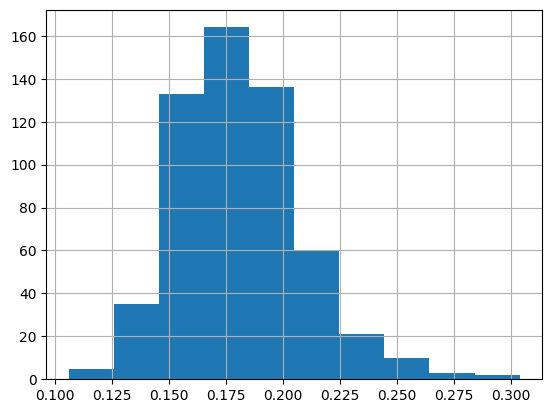

In [23]:
data.symmetry_mean.hist()

In [24]:
B_symmetry = B.symmetry_mean.values
M_symmetry = M.symmetry_mean.values


print("Variance of mean symmetry for Benign tumors: {:.6f}".format( B_symmetry.var()) )
print("Variance of mean symmetry for Malignant tumors: {:.6f}".format( M_symmetry.var()) )


Variance of mean symmetry for Benign tumors: 0.000614
Variance of mean symmetry for Malignant tumors: 0.000760


**The variable seems to respect both condition to use a Student t test:**
- An almost gaussian distribution
- Similar variances between groups

In [25]:
import scipy.stats as stats

t_stat, p_value = stats.ttest_ind(B_symmetry, M_symmetry, alternative='two-sided')

print("T-statistic value: ", t_stat)
print("P-Value: ", p_value)

T-statistic value:  -8.338311789592808
P-Value:  5.733384028466827e-16


$pvalue < 0.05$ ; On peut rejeter H0 au risque $\alpha$ = 5%

**There is a significative difference between the symmetry of a benign tumor and a malignant one.**

#### We can graphically verify - Using histograms

114.45


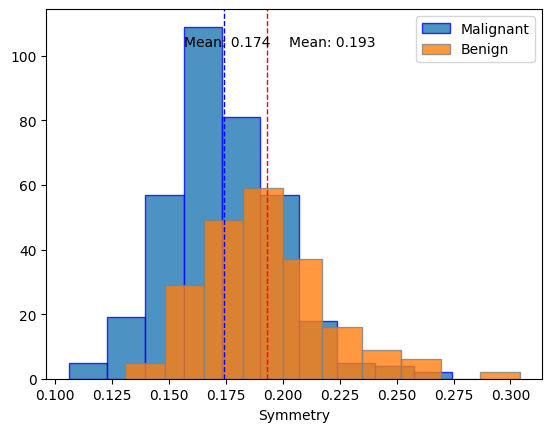

In [26]:
import matplotlib.pyplot as plt


# plotting first histogram
plot = plt.hist(x=B_symmetry, label='Malignant', alpha=.8, edgecolor='blue')

# plotting second histogram
plot = plt.hist(x=M_symmetry, label='Benign', alpha=.8, edgecolor='grey')

# Define limit of the plot
min_ylim, max_ylim = plt.ylim()

print(max_ylim)
# Adding annotation for the mean
plt.axvline(B_symmetry.mean(), color='blue', linestyle='dashed', linewidth=1)
plt.text(B_symmetry.mean()*.9, max_ylim*0.9, 'Mean: {:.3f}'.format(B_symmetry.mean()))

plt.axvline(M_symmetry.mean(), color='red', linestyle='dashed', linewidth=1)
plt.text(M_symmetry.mean()*1.05, max_ylim*0.9, 'Mean: {:.3f}'.format(M_symmetry.mean()))

plt.legend()
plt.xlabel("Symmetry")

# Showing the plot using plt.show()
plt.show()

#### We can graphically verify - Using boxplot:

Text(0.5, 1.0, 'Boxplot of symmetry_mean for the benign and malignant tumor')

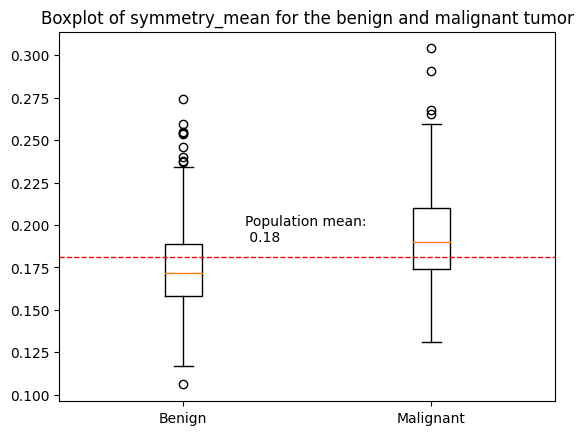

In [27]:
my_dict = {'Benign': B_symmetry, 'Malignant': M_symmetry}

fig, ax = plt.subplots()
ax.boxplot(my_dict.values())
ax.set_xticklabels(my_dict.keys())
min_xlim, max_xlim = plt.xlim()

plt.axhline(data.symmetry_mean.mean(), color='red', linestyle='dashed', linewidth=1)
plt.text(max_xlim*.5, data.symmetry_mean.mean()*1.05, 'Population mean: \n {:.2f}'.format(data.symmetry_mean.mean() ) )


plt.title("Boxplot of symmetry_mean for the benign and malignant tumor")

### __Observation__

>We can see that perhaps the variable **Symmetry_mean** might be a good predictor of the tumor state: a lower value of symmetry for a tumor might lead to a malignant tumor

## Check the correlation between variables:

In [28]:
data.iloc[:,2:].corr()

,symmetry_mean,concave points_mean,concavity_mean,compactness_mean,smoothness_mean,area_mean,perimeter_mean,texture_mean,radius_mean
symmetry_mean,1.000000,0.462497,0.500667,0.602641,0.557775,0.151293,0.183027,0.071401,0.147741
concave points_mean,0.462497,1.000000,0.921391,0.831135,0.553695,0.823269,0.850977,0.293464,0.822529
concavity_mean,0.500667,0.921391,1.000000,0.883121,0.521984,0.685983,0.716136,0.302418,0.676764
compactness_mean,0.602641,0.831135,0.883121,1.000000,0.659123,0.498502,0.556936,0.236702,0.506124
smoothness_mean,0.557775,0.553695,0.521984,0.659123,1.000000,0.177028,0.207278,-0.023389,0.170581
area_mean,0.151293,0.823269,0.685983,0.498502,0.177028,1.000000,0.986507,0.321086,0.987357
perimeter_mean,0.183027,0.850977,0.716136,0.556936,0.207278,0.986507,1.000000,0.329533,0.997855
texture_mean,0.071401,0.293464,0.302418,0.236702,-0.023389,0.321086,0.329533,1.000000,0.323782
radius_mean,0.147741,0.822529,0.676764,0.506124,0.170581,0.987357,0.997855,0.323782,1.000000


<AxesSubplot: title={'center': 'Breast Cancer Feature Correlation'}>

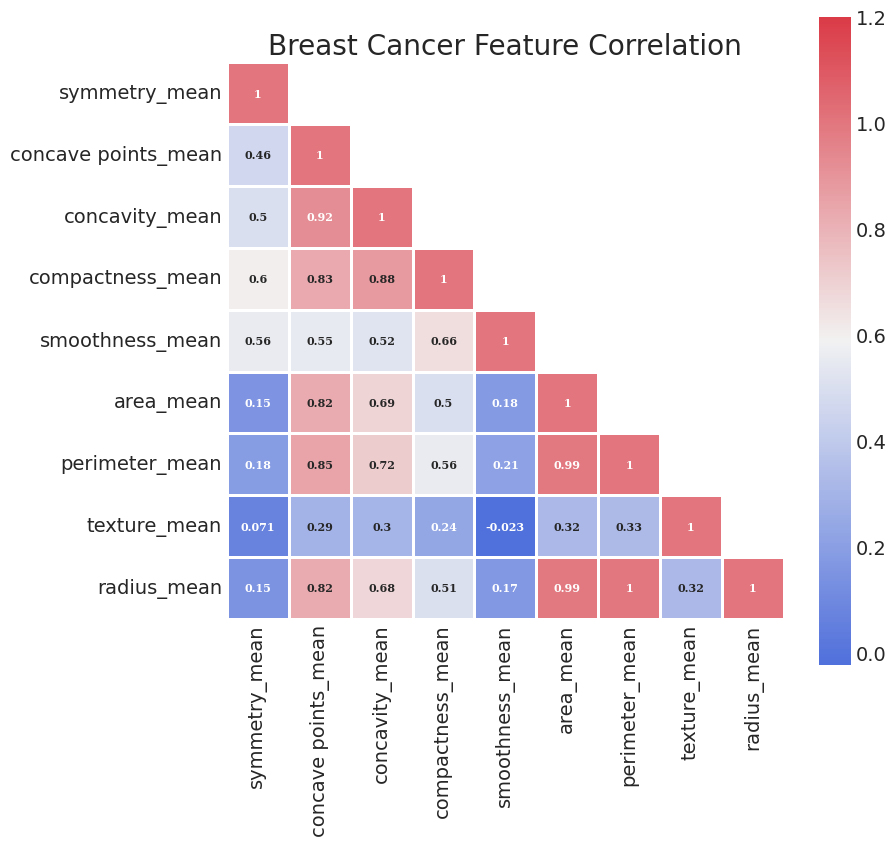

In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

plt.style.use('fivethirtyeight')
sns.set_style("white")

# Compute the correlation matrix
corr = data.iloc[:,2:].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr)

# Masking upper triangle
mask[np.triu_indices_from(mask)] = True
# Showing the diagonal
mask[np.diag_indices_from(mask)] = False

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(8, 8))
plt.title('Breast Cancer Feature Correlation')

# Generate a custom diverging colormap
cmap = sns.diverging_palette(260, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, vmax=1.2, square='square', cmap=cmap, mask = mask,
            ax=ax,annot=True, fmt='.2g',linewidths=2,
            annot_kws={"fontsize": 8, "fontweight": "bold", "fontfamily": "serif"},)

### Observation:
We can see strong positive relationship exists with mean values paramaters between 1-0.75;.
* The mean area of the tissue nucleus has a strong positive correlation with mean values of radius and parameter;
* Some parameters are moderately positive correlated (r between 0.5-0.75)are concavity and area, concavity and perimeter etc
* Likewise, we see some strong negative correlation between fractal_dimension with radius, texture, parameter mean values.
    

### We can also have an overview of the relation between variables with the seaborn package:

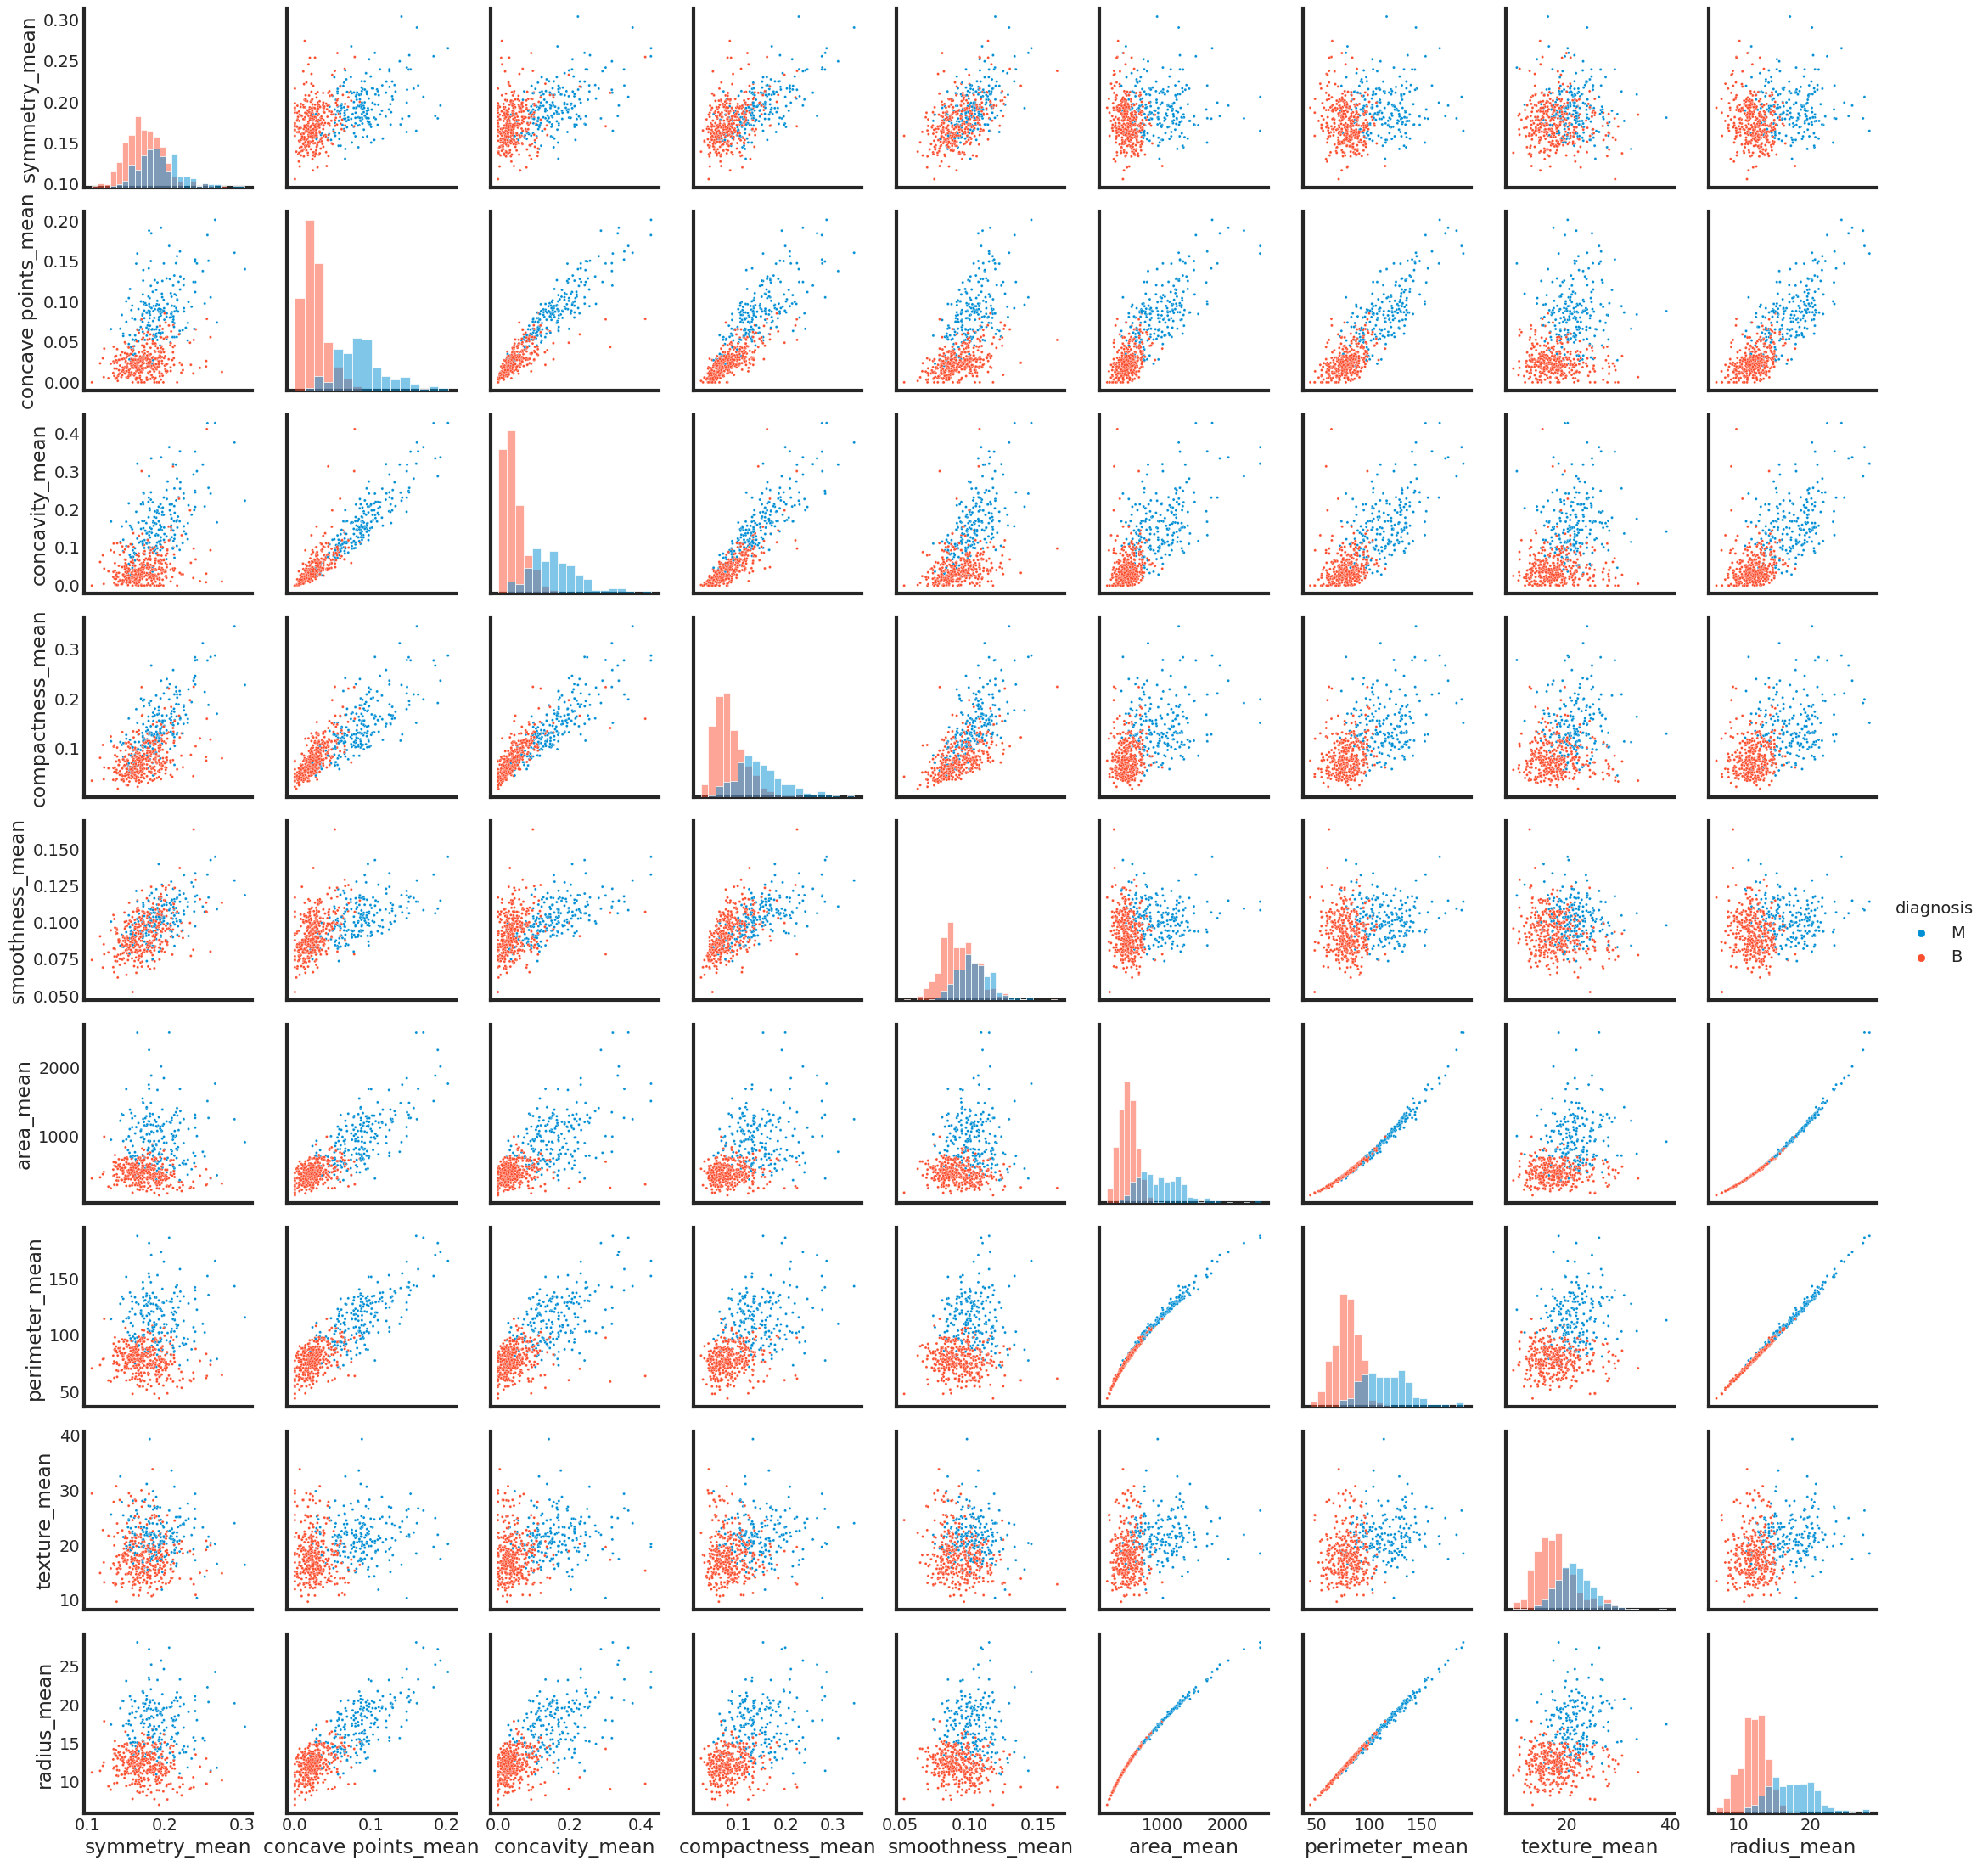

In [30]:
plt.style.use('fivethirtyeight')
sns.set_style("white")

columns_to_show = data.columns[2:10].tolist() + ['diagnosis','radius_mean']


g = sns.PairGrid(data[columns_to_show] , hue = 'diagnosis' )

g = g.map_diag(sns.histplot)
g = g.map_offdiag(sns.scatterplot, s = 5)
g.add_legend()

### Summary

* Mean values of cell radius, perimeter, area, compactness, concavity
    and concave points can be used in classification of the cancer. Larger
    values of these parameters tends to show a correlation with malignant
    tumors.
* mean values of texture, smoothness, symmetry or fractual dimension
    does not show a particular preference of one diagnosis over the other.